# Comparing SVM Kernel Performance on the Iris Dataset

In this program we are going to compare the performance of the SVM algorith on the Iris dataset with the use different kernels. We begin by reading the dataset into a dataframe and reviewing its composition.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.utils.testing import ignore_warnings
import warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=FutureWarning)

df = pd.read_csv('iris.csv')
# check data type and for missing entries
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


Next we will compute some basic statistics for the datset and also visualise these using boxplots.

In [30]:
# generate basic statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


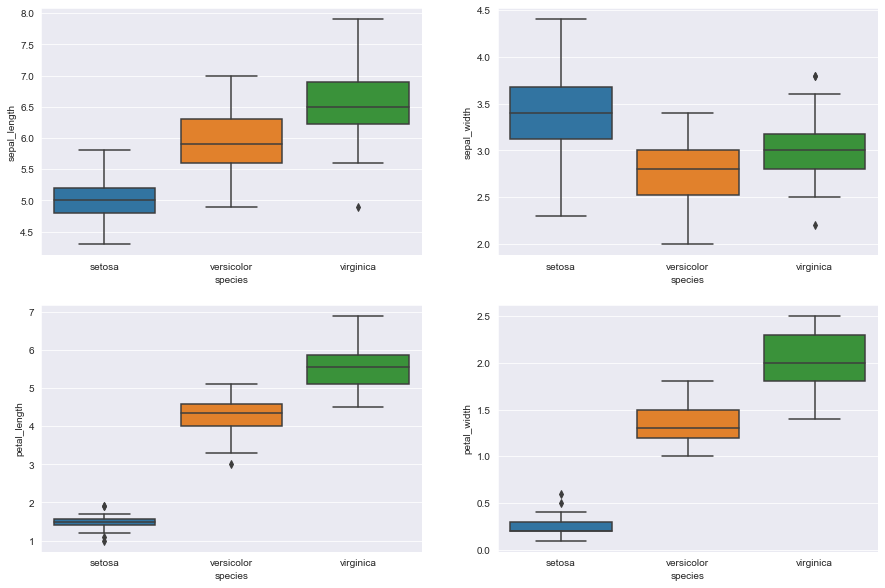

In [31]:
# view as boxplots
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(y = 'sepal_length', x = 'species', data = df, orient = 'v', ax = axes[0, 0])
sns.boxplot(y = 'sepal_width', x = 'species', data = df, orient = 'v', ax = axes[0, 1])
sns.boxplot(y = 'petal_length', x = 'species', data = df, orient = 'v', ax = axes[1, 0])
sns.boxplot(y = 'petal_width', x = 'species', data = df, orient = 'v', ax = axes[1, 1])
plt.show()

The seaborn pairplot function enables us to visualise the plots of the three species with different features along the x and y axes and also to visualise the feature distribution for each species.

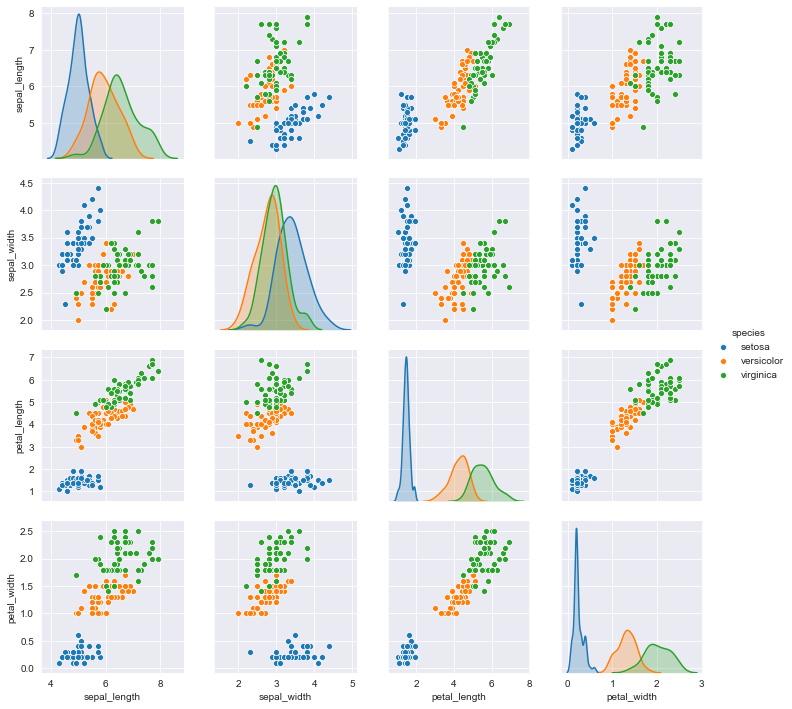

In [32]:
sns.pairplot(df, hue = 'species')
plt.show()

Although multicollinearity is not generally an issue in SVM, it can still be informative to check the correlations between the features.

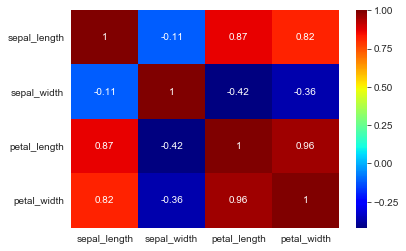

In [33]:
# check correlations between the features
correlation_matrix = df.corr().round(2)
ax = sns.heatmap(correlation_matrix, annot = True, cmap = 'jet')

All of the features are strongly correlated, with the exception of the sepal width. Looking back at the pairplot we can gets some indication of why this is the case.

Now we will assign the features and the target labels. Even though the features are on a similar scale we will still utilise feature scaling as SVM is very sensitive to feature scales. Following this, we separate the data into training and testing sets.

In [34]:
# assign the features to X and the target to y
X = df.drop('species', axis = 1)
y = df['species']

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 16)

We are going to run the SVM algorithm using three different kernel functions: the linear kernel, the polynomial kernel and the Radial Basis Function (RBF) kernel. We will evaluate the performance of each model using the confusion matrix and classification report.

In [35]:
kernels = ['linear', 'poly', 'rbf']
len(kernels)
for i in range(len(kernels)):
    print('{} kernel'.format(kernels[i]))
    print('-------------')
    # create classifier
    svc = SVC(kernel = kernels[i])
    # fit to training data
    svc.fit(X_train, y_train)
    # predict y labels
    y_pred = svc.predict(X_test)
    # generate confusion matrix
    print(confusion_matrix(y_test, y_pred))
    # generate classification report
    print(classification_report(y_test, y_pred))
    print('\n')

linear kernel
-------------
[[15  0  0]
 [ 0 16  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



poly kernel
-------------
[[15  0  0]
 [ 0 17  0]
 [ 0  3 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.85      1.00      0.92        17
   virginica       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45



rbf kernel
-------------
[[15  0  0]
 [ 0 16  1]
 [ 0  1 12]]
              precision    recall  f1-score 

Performance is excellent with all three kernel functions, with the polynomial kernel being the best. We could further refine the models by tuning the relevant hyperparameters, and experimenting with the degree of the polynomial kernel.